In [5]:
# Imports
import numpy as np
import matplotlib.pylab as plt
from solveFDFD import solveFDFD
%matplotlib inline

In [86]:
# Define Parameters
pol = 'TM'
timing = True
L0 = 1e-6
wvlen = 0.5
xrange = [-2, 2]
yrange = [-2, 2]
Nx = 200
Ny = 100
L_box = 50
H_box = 40
eps = 3
npml = 10

In [87]:
# Set Up Simulation Variables
nx = int(Nx//2)
ny = int(Ny//2)
src_pos_og = int((Nx/2.0-npml)//2) + npml
src_pos_aj = Nx - int((Nx/2.0-npml)//2) + npml
eps_r = np.ones((Nx,Ny))
eps_r[nx-int(L_box//2):nx+int(L_box//2), ny-int(H_box//2):ny+int(H_box//2)] = eps
SRC_og = np.zeros((Nx,Ny))
SRC_aj = np.zeros((Nx,Ny))
SRC_og[src_pos_og,ny] = 1
SRC_aj[src_pos_aj,ny] = 1
Npml = [npml,npml,npml,npml]
delta_device = 1.*(eps_r>1)
k0 = 2*np.pi/wvlen

In [65]:
# Do original simulation and adjoint simulation
(_, _, Ez_og, Hx_og, Hy_og, _, _) = solveFDFD(pol, L0, wvlen, xrange, yrange, eps_r, SRC_og, Npml, timing=timing)
(_, _, Ez_aj, Hx_aj, Hy_aj, _, _) = solveFDFD(pol, L0, wvlen, xrange, yrange, eps_r, SRC_aj, Npml, timing=timing)

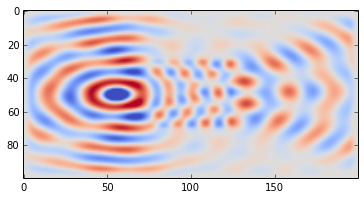

In [66]:
# plot original fields and get field strength
imgplot_og = plt.imshow(np.real(Ez_og), clim=(-.4,.4))
imgplot_og.set_cmap('coolwarm')
plt.show()
meas = np.sum(Ez_og.T*SRC_aj)

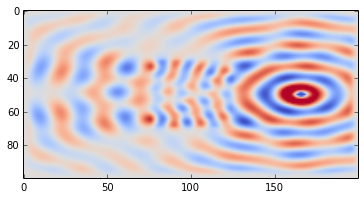

In [72]:
# Multiply the correct adjoint prefactor and plot adjoint fields
Ez_aj_norm = -2*np.multiply(np.conj(meas),Ez_aj)
imgplot_aj = plt.imshow(np.real(Ez_aj_norm), clim=(-.2,.2))
imgplot_aj.set_cmap('coolwarm')
plt.show()

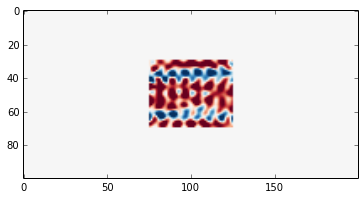

In [85]:
# Compute adjoint sensitivity and plot
dJde = -k0**2*np.real(np.multiply(np.multiply(Ez_aj_norm,Ez_og),delta_device.T))
imgplot_sens = plt.imshow(dJde,clim=(-2,2))
imgplot_sens.set_cmap('RdBu')
plt.show()